In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('0056_PR.csv')
data.set_index(pd.to_datetime(data['Date']),inplace=True)
data.drop('Date',axis=1,inplace=True)
data.head()

,Price
Date,
2016-03-31,22.43
2016-04-01,22.28
2016-04-06,22.08
2016-04-07,22.03
2016-04-08,21.95


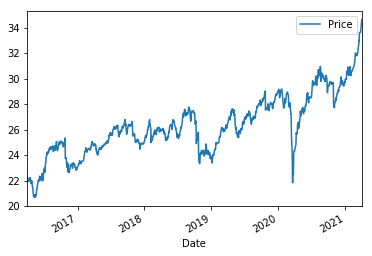

In [3]:
data.plot()

In [4]:
base=1
down=-0.1
N=2

start='2016-03-31'
end='2021-03-31'

In [5]:
df=data.copy()
df=df.loc[start:end]

df['dr']=df.pct_change(1)
df['r']=df['dr'].add(1).cumprod()
df['dd']=df['r'].div(df['r'].cummax()).sub(1)
df.head()

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,Price,dr,r,dd
Date,,,,
2016-03-31,22.43,NaN,NaN,NaN
2016-04-01,22.28,-0.006687,0.993313,0.000000
2016-04-06,22.08,-0.008977,0.984396,-0.008977
2016-04-07,22.03,-0.002264,0.982167,-0.011221
2016-04-08,21.95,-0.003631,0.978600,-0.014811


# 打造正金字塔部位

In [6]:
total_cost_list=[]
unit_list=[]
pre_NAV_list=[0]
TR_list=[0]
unit_add=0

for i,price in enumerate(df['Price']):
    if i==0:
        unit=base
        total_cost=unit*price
        unit_list.append(unit)
        total_cost_list.append(total_cost)
    else:
        if df['dd'].iloc[i]<down*3 and df['dd'].iloc[i-1]>down*3 and unit_add<N*3:
            unit=unit+N*3
            total_cost+=N*3*price
            unit_add=N*3
        elif df['dd'].iloc[i]<down*2 and df['dd'].iloc[i-1]>down*2 and unit_add<N*2:
            unit=unit+N*2
            total_cost+=N*2*price
            unit_add=N*2
        elif df['dd'].iloc[i]<down and df['dd'].iloc[i-1]>down and unit_add<N:
            unit=unit+N
            total_cost+=N*price
            unit_add=N
        pre_NAV=unit_list[i-1]*price
        TR=pre_NAV/total_cost_list[-1]-1
        total_cost_list.append(total_cost)
        unit_list.append(unit)
        pre_NAV_list.append(pre_NAV)
        TR_list.append(TR)
        

df['total_cost']=total_cost_list
df['unit']=unit_list
df['pre_NAV']=pre_NAV_list
df['total_return']=TR_list

In [7]:
df.tail()

,Price,dr,r,dd,total_cost,unit,pre_NAV,total_return
Date,,,,,,,,
2021-03-25,33.66,0.000297,1.500669,0.0,161.03,7,235.62,0.463206
2021-03-26,33.80,0.004159,1.506910,0.0,161.03,7,236.60,0.469291
2021-03-29,34.34,0.015976,1.530985,0.0,161.03,7,240.38,0.492765
2021-03-30,34.60,0.007571,1.542577,0.0,161.03,7,242.20,0.504068
2021-03-31,34.63,0.000867,1.543914,0.0,161.03,7,242.41,0.505372


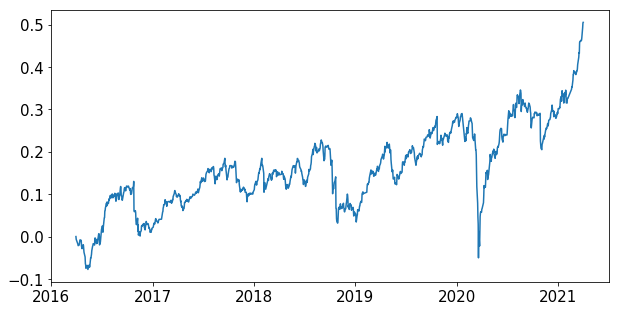

In [8]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df['total_return'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 增加進場次數

In [9]:
total_cost_list=[]
unit_list=[]
pre_NAV_list=[0]
TR_list=[0]
unit_add=0
maxr=df['r'].iloc[1]

for i,price in enumerate(df['Price']):
    if i==0:
        unit=base
        total_cost=unit*price
        unit_list.append(unit)
        total_cost_list.append(total_cost)
    else:
        if df['r'].iloc[i]>maxr:
            maxr=df['r'].iloc[i]
            unit_add=0
        else:
            if df['dd'].iloc[i]<down*3 and df['dd'].iloc[i-1]>down*3 and unit_add<N*3:
                unit=unit+N*3
                total_cost+=N*3*price
                unit_add=N*3
            elif df['dd'].iloc[i]<down*2 and df['dd'].iloc[i-1]>down*2 and unit_add<N*2:
                unit=unit+N*2
                total_cost+=N*2*price
                unit_add=N*2
            elif df['dd'].iloc[i]<down and df['dd'].iloc[i-1]>down and unit_add<N:
                unit=unit+N
                total_cost+=N*price
                unit_add=N
        pre_NAV=unit_list[i-1]*price
        TR=pre_NAV/total_cost_list[-1]-1
        total_cost_list.append(total_cost)
        unit_list.append(unit)
        pre_NAV_list.append(pre_NAV)
        TR_list.append(TR)
        

df['total_cost']=total_cost_list
df['unit']=unit_list
df['pre_NAV']=pre_NAV_list
df['total_return']=TR_list

In [10]:
df.tail()

,Price,dr,r,dd,total_cost,unit,pre_NAV,total_return
Date,,,,,,,,
2021-03-25,33.66,0.000297,1.500669,0.0,318.31,13,437.58,0.374698
2021-03-26,33.80,0.004159,1.506910,0.0,318.31,13,439.40,0.380415
2021-03-29,34.34,0.015976,1.530985,0.0,318.31,13,446.42,0.402469
2021-03-30,34.60,0.007571,1.542577,0.0,318.31,13,449.80,0.413088
2021-03-31,34.63,0.000867,1.543914,0.0,318.31,13,450.19,0.414313


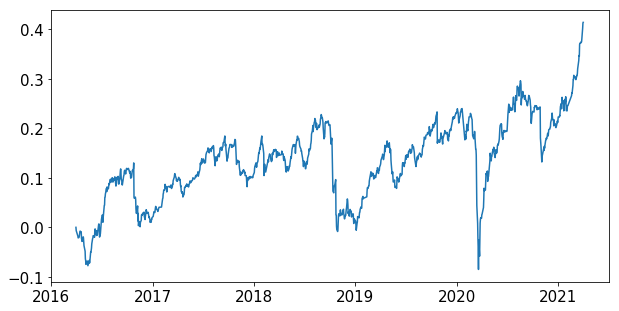

In [11]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df['total_return'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()